In [25]:
# Importar librerías.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Importación de datos.
df_spain=pd.read_excel("/content/Spain Stats.xlsx")
df_france = pd.read_excel("/content/France Stats.xlsx")
df_lamine = pd.read_excel("/content/Stats_Lamine.xlsx")

In [27]:
# Función obtener jugadores por posición:
def get_player_by_position(df, position):
    return df[df['Pos'] == position]
# Función para optener el top player de cualquier stat
def get_top_players(df, stat, n=5):
    return df.sort_values(by=stat, ascending=False).head(n)[['Player', stat]]
# Obtenemos posición de ambas selecciones
gk_spain=get_player_by_position(df_spain,'GK')
lb_spain=get_player_by_position(df_spain,'LB')
cb_spain=get_player_by_position(df_spain,'CB')
rb_spain=get_player_by_position(df_spain,'RB')
mf_spain = get_player_by_position(df_spain, 'MF')
fw_spain=get_player_by_position(df_spain,'FW')


gk_france=get_player_by_position(df_france,'GK')
lb_france=get_player_by_position(df_france,'LB')
cb_france=get_player_by_position(df_france,'CB')
rb_france=get_player_by_position(df_france,'RB')
mf_france = get_player_by_position(df_france, 'MF')
fw_france=get_player_by_position(df_france,'FW')

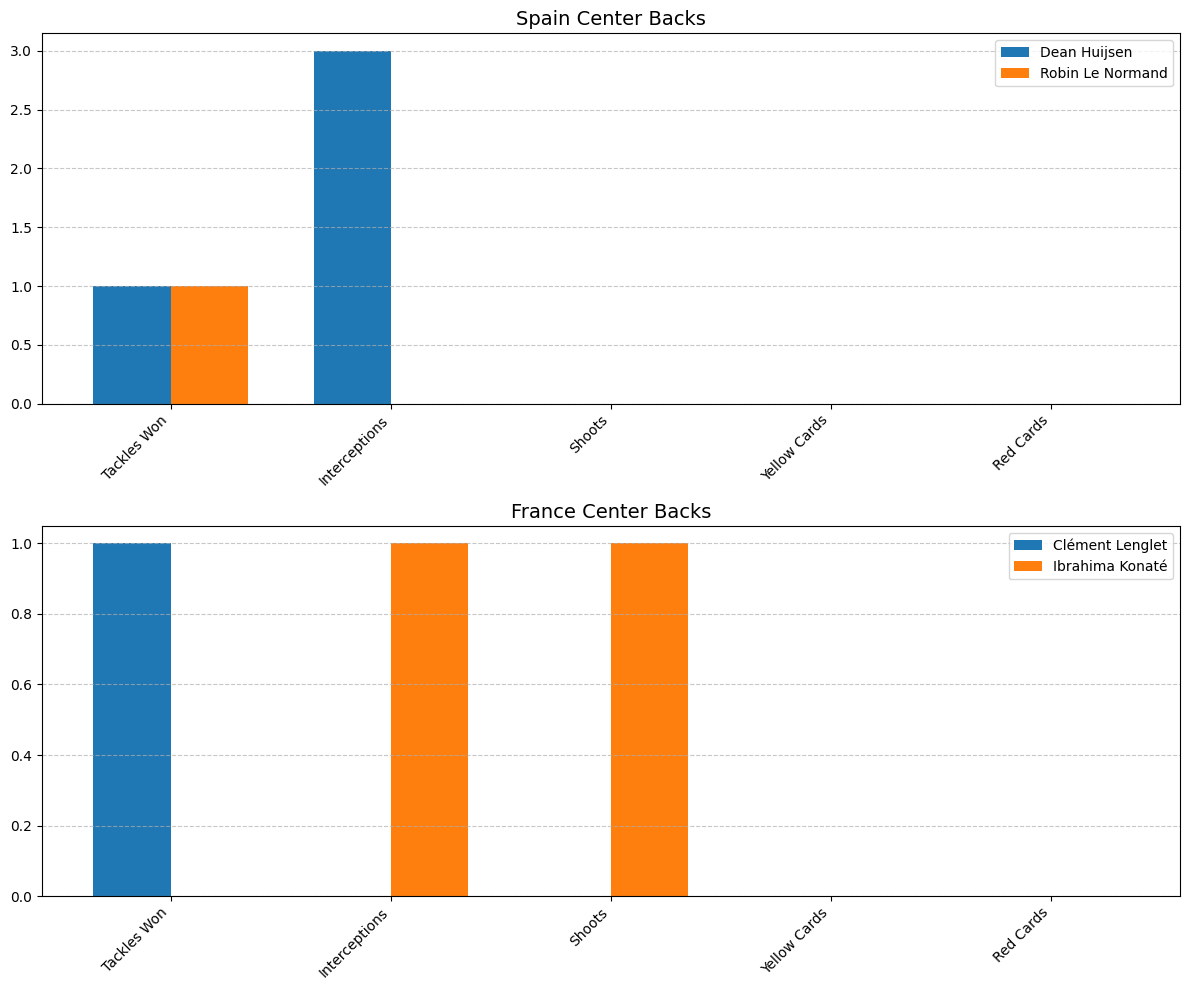

In [28]:
# Configuración
stats = ['TklW', 'Int', 'Sh', 'CrdY', 'CrdR']
labels = ['Tackles Won', 'Interceptions', 'Shoots', 'Yellow Cards', 'Red Cards']

# Obtener los 2 mejores CBs de cada equipo (basado en TklW)
def get_top_2_cb(df):
    cbs = df[df['Pos'] == 'CB'].sort_values('TklW', ascending=False)
    return cbs.iloc[0], cbs.iloc[1]

cb_spain1, cb_spain2 = get_top_2_cb(df_spain)
cb_france1, cb_france2 = get_top_2_cb(df_france)

# Datos para el gráfico
players = {
    'España': [cb_spain1, cb_spain2],
    'Francia': [cb_france1, cb_france2]
}

# Configurar el gráfico
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
bar_width = 0.35
index = np.arange(len(stats))

# Colores
colors = ['#1f77b4', '#ff7f0e']  # Azul y naranja

# Gráfico para España
for i, player in enumerate(players['España']):
    axes[0].bar(index + i * bar_width, [player[stat] for stat in stats],
                bar_width, label=player['Player'], color=colors[i])

axes[0].set_title('Spain Center Backs', fontsize=14)
axes[0].set_xticks(index + bar_width / 2)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para Francia
for i, player in enumerate(players['Francia']):
    axes[1].bar(index + i * bar_width, [player[stat] for stat in stats],
                bar_width, label=player['Player'], color=colors[i])

axes[1].set_title('France Center Backs', fontsize=14)
axes[1].set_xticks(index + bar_width / 2)
axes[1].set_xticklabels(labels, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

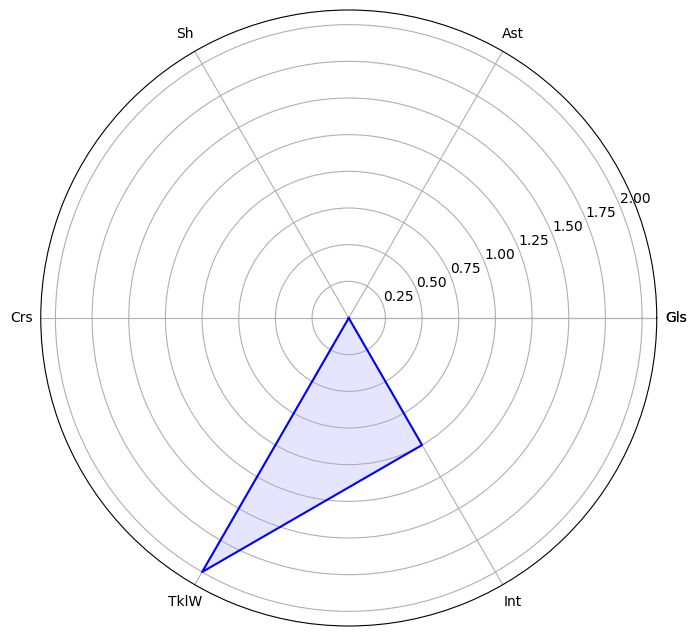

In [29]:
# Supongamos que tenemos estos datos para Pedri
merino_data = df_spain[df_spain['Player'] == 'Mikel Merino'].iloc[0]

kone_data = df_france[df_france['Player'] == 'Manu Koné'].iloc[0]

# Seleccionamos las métricas a mostrar
categories = ['Gls', 'Ast', 'Sh', 'Crs', 'TklW','Int']
values = [kone_data[cat] for cat in categories]

# Duplicamos la primera categoría para cerrar el círculo
categories = [*categories, categories[0]]
values = [*values, values[0]]

# Ángulos para cada eje
label_loc = np.linspace(start=0, stop=2*np.pi, num=len(values))

# Crear el gráfico
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, values, label='', color='blue')
plt.fill(label_loc, values, color='blue', alpha=0.1)

# Añadir etiquetas
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

plt.show()

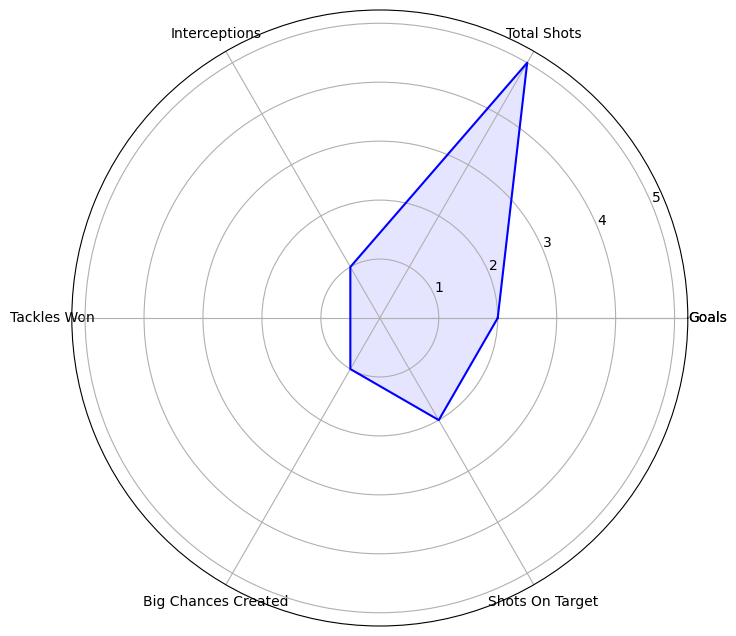

In [39]:
# Datos men of the match
lamine_data = df_lamine[df_lamine['Player Rating'] == 8.7].iloc[0]


# Seleccionamos las métricas a mostrar
categories = ['Goals', 'Total Shots', 'Interceptions', 'Tackles Won',
              'Big Chances Created', 'Shots On Target']
values = [lamine_data[cat] for cat in categories]

# Duplicamos la primera categoría para cerrar el círculo
categories = [*categories, categories[0]]
values = [*values, values[0]]

# Ángulos para cada eje
label_loc = np.linspace(start=0, stop=2*np.pi, num=len(values))

# Crear el gráfico
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, values, label='', color='blue')
plt.fill(label_loc, values, color='blue', alpha=0.1)

# Añadir etiquetas
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

plt.show()

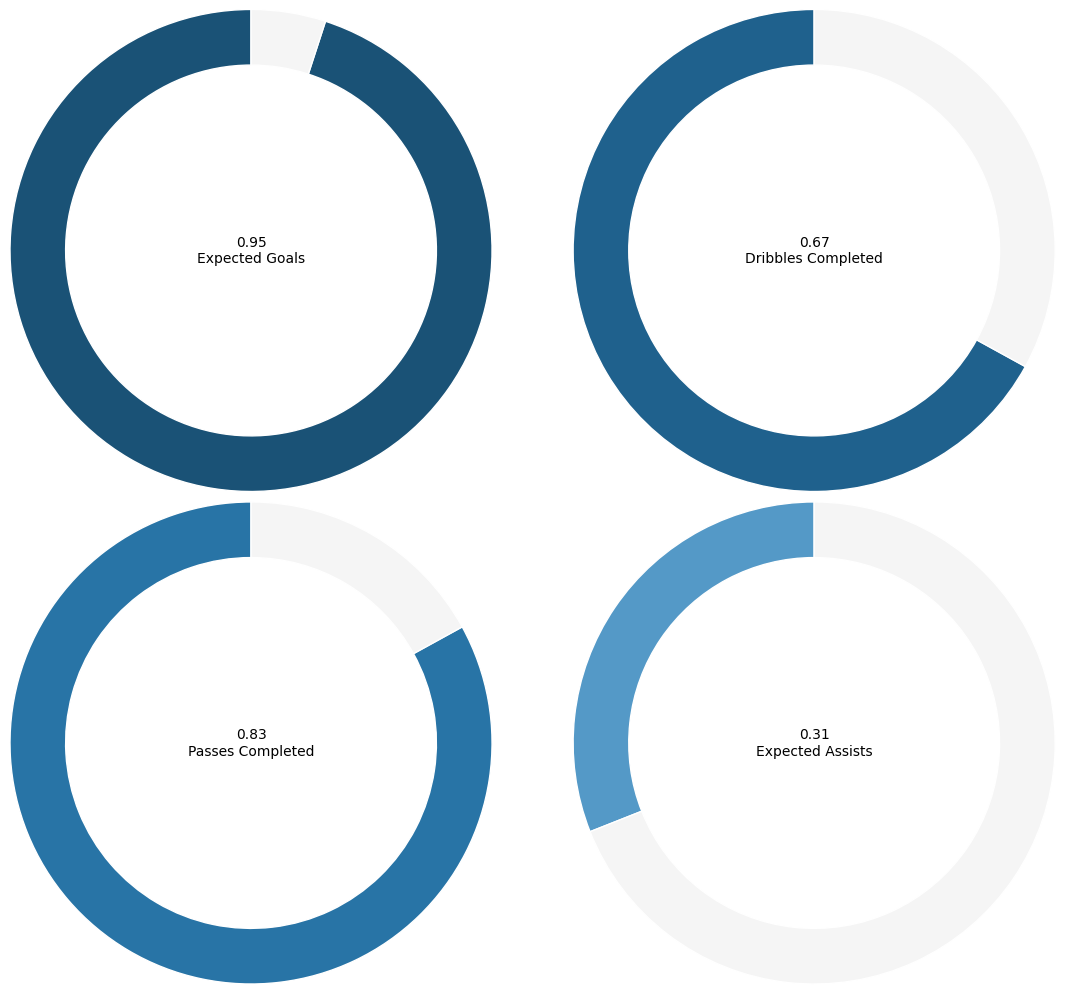

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (valores porcentuales convertidos a escala 0-100)
metrics = ['Expected Goals (xG)', 'Dribbles Completed', 'Passes Completed', 'Expected Assists (xA)']
lamine_values = [0.95, 0.67, 0.83, 0.31]  # Valores por partido
max_values = [1.0, 1.0, 1.0, 1.0]     # Valores máximos de referencia (personalizables)

# Convertir a porcentajes relativos (opcional)
percentages = [min(100, (val/max_val)*100) for val, max_val in zip(lamine_values, max_values)]

# Configuración de estilo
colors = ['#1a5276', '#1f618d', '#2874a6', '#5499c7']
explode = (0.05, 0.05, 0.05, 0.05)  # Separar ligeramente los anillos

# Crear figura con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Generar un gráfico de anillo por métrica
for i, (ax, metric, value, color) in enumerate(zip(axs.flat, metrics, lamine_values, colors)):
    # Datos para el anillo (valor vs resto)
    data = [value, max_values[i] - value]

    ax.pie(data,
           radius=1.3,
           colors=[color, '#F5F5F5'],
           startangle=90,
           wedgeprops=dict(width=0.3, edgecolor='w'))

    # Añadir texto central
    ax.text(0, 0, f"{value}\n{metric.split('(')[0].strip()}",
            ha='center', va='center', fontsize=10)

    ax.set(aspect="equal")

# Ajustar espaciado
plt.tight_layout()
plt.show()